<font size='4' color='red'>**Obiettivo:**<font>

<font size='4'>Analizzeremo i suicidi attraverso dati relativi a 101 paesi d'interesse nel mondo (ad esempio gran parte dell'Africa non è presente, anche solo per la difficoltà di raccolta dei dati), negli ultimi 30 anni circa; per arrivare a capire quale sia il trend  del tasso dei suicidi, comprendere se questo sia preoccupante, se ha avuto una stretta connessione con eventi di crisi internazionali (esempio: crisi economiche) e capire se sia necessario agire in qualche misura per mitigarne l'eventuale ascesa</font>

<font size='4' color='red'>**Fonte dei dati:**<font>

<font size='4'>Il dataframe da cui abbiamo preso i dati si trova su Kaggle all'indirizzo seguente: </font>
https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
<br><font size='4'>In seguito abbiamo eliminato alcune colonne da questo perché non erano utili all'obiettivo da noi posto e creavano solo difficoltà nella lettura </font>

<font size='4' color='red'>**Analisi:**<font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size='3'>**Carichiamo il dataset dentro alla nostra variabile df** </font>

In [2]:
#salviamo il dataframe dentro alla variabile df
df = pd.read_csv('master.csv')

In [10]:
df

,country,year,sex,age,suicides_no,population
0,Albania,1987,male,15-24 years,21,312900
1,Albania,1987,male,35-54 years,16,308000
2,Albania,1987,female,15-24 years,14,289700
3,Albania,1987,male,75+ years,1,21800
4,Albania,1987,male,25-34 years,9,274300
...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833
27816,Uzbekistan,2014,female,75+ years,9,348465
27817,Uzbekistan,2014,male,5-14 years,60,2762158
27818,Uzbekistan,2014,female,5-14 years,44,2631600


<font size='3'>**Eliminiamo alcune colonne che non ci interessano** </font>

In [4]:
df.drop('HDI for year', axis=1, inplace = True)

In [5]:
df.drop(df.columns[[9]], axis=1, inplace = True)

In [6]:
df.drop(df.columns[[9]], axis=1, inplace = True)

In [7]:
df.drop(df.columns[[8]], axis=1, inplace = True)

In [8]:
df.drop(df.columns[[7]], axis=1, inplace = True)

In [9]:
df.drop(df.columns[[6]], axis=1, inplace = True)

<font size='3'>**Stampiamo il numero totale di uomini e donne** </font>

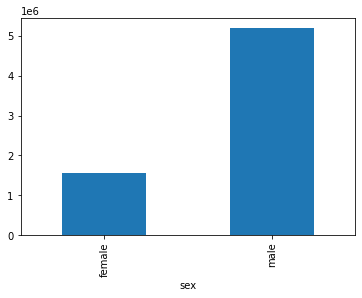

In [11]:
df.groupby('sex').suicides_no.sum().plot.bar(stacked=True);

<font size='3'>**Stampiamo il numero di suicidi per fasce d'età** </font>

In [12]:
#andiamo a creare una variabile order per stabilire in che ordine i dati andranno
# poi rappresentati lungo l'asse x dei nostri grafici
order = ["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]

<AxesSubplot:xlabel='age'>

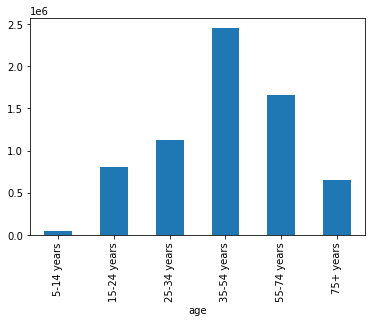

In [13]:
#i dati lungo l'asse Y sono da considerarsi in milioni(1e6)
a = df.groupby('age').suicides_no.sum()
a.loc[order].plot.bar()

<font size='3'>**Stampiamo il numero di suicidi per fasce d'età, divisi per sesso** </font>

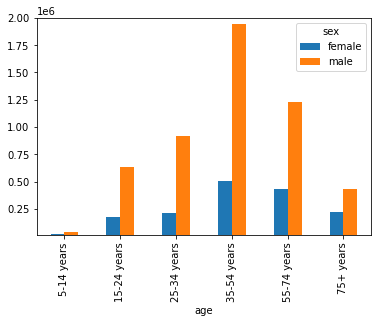

In [14]:
#i dati lungo l'asse Y sono da considerarsi in milioni(1e6)
b = df.groupby(['age', 'sex']).suicides_no.sum()
b.unstack().loc[order].plot.bar().set_ylim(10000,2000000);

<font size='3'>**Stampiamo il numero di suicidi per anno** </font>

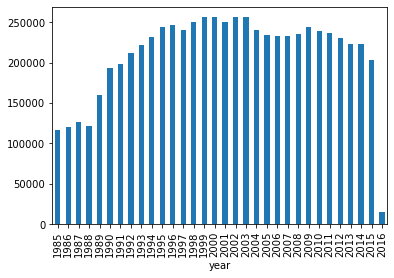

In [15]:
df.groupby('year').suicides_no.sum().plot.bar(stacked=True);

<font size='4' color='red'>**Conclusioni analisi:**<font>

<font size='3'>Dal primo grafico possiamo vedere che il numero di suicidi maschili è molto maggiore rispetto a quello dei suicidi femminili; sapendo che una delle cause note è quella della crisi economica familiare e che nella società è sempre stato percepito come compito dell'uomo badare alle necessità finanziarie, il dato evidenziato non sorprende<font>

<font size='3'>Dal secondo e terzo grafico si nota che le fasce centrali sono quelle con valori maggiori, cosa che ci si può aspettare date le maggiori responsabilità e difficoltà che in genere si incontrano in quegli anni di vita e che si può ricondurre anche alle conclusioni tratte riguardo il primo grafico. <br> Il valore evidenziato dalla fascia 15-24 anni sottolinea invece che probabilmente esistono altre forti cause di suicidi, dato che in gran parte in quell'età si è ancora supportati dai genitori; perciò possiamo ricondurre le cause all'ambito dei problemi di natura mentale e/o sociale (che sono comunque cause note di suicidi in generale e che influenzano tutte le fasce)<font>

<font size='3'>Infine dai dati del quarto grafico si evince che da fine anni '80 c'è stato un notevole incremento di suicidi, non ne è possibile determinare con certezza la causa, anche perché non è stato un periodo in cui vi sono verificate particolari crisi socioeconomiche. <br> Contro le nostre aspettative quando invece ci fu una vera e propria crisi globale intorno al 2008 non avvenne un conseguente innalzamento del numero di suicidi, se non per un singolo anno(2009)<font>

<font size='4' color='red'>**Regressione lineare** </font>

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

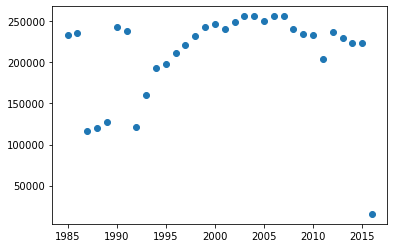

In [17]:
#assegniamo Y e X per la regressione, al primo assegniamo il numero di suicidi per anno, al secondo gli anni
Y = df.groupby('year').suicides_no.sum().to_numpy()
X = df['year'].unique().reshape(-1,1)

plt.scatter(X, Y)

<font size='3'>**Escludiamo i dati relativi all'anno 2016, essendo incompleti** </font>

In [18]:
X = X[:-1]

In [19]:
Y = Y[:-1]

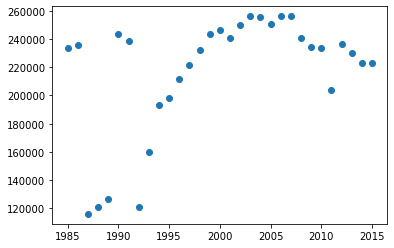

In [20]:
plt.scatter(X, Y)

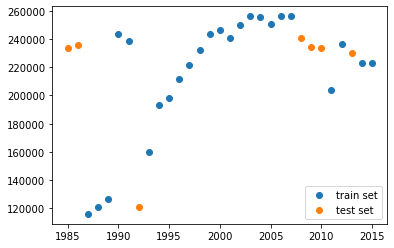

In [21]:
#splittiamo i dati in due set, quello di train per allenare la regressione
#e quello di test per verificarne il funzionamento 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
plt.scatter(X_train, Y_train, label='train set')
plt.scatter(X_test, Y_test, label='test set')
plt.legend()
plt.show()

In [22]:
#creiamo la regressione 
reg = LinearRegression()

In [23]:
#alleniamo la regressione sul train set
reg.fit(X_train, Y_train)

LinearRegression()

In [24]:
#effettuiamo la previsione passandogli il test set
Y_pred = reg.predict(X_test)

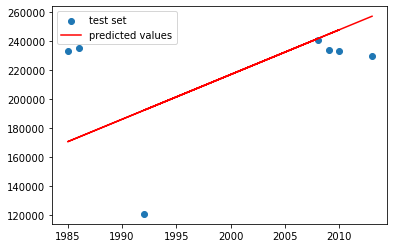

In [25]:
plt.scatter(X_test, Y_test, label='test set')
plt.plot(X_test, Y_pred, color='red', label='predicted values')
plt.legend()
plt.show()

<font size='4' color='red'>**Conclusioni regressione lineare:**<font>

<font size='3'>La regressione lineare ci rende chiaro che negli ultimi 30 anni il trend del tasso di suicidi è stato in ascesa, però possiamo andare a considerare almeno altri due fattori che ci fanno pensare che il trend non sia in forma di un'ascesa allarmante: il primo è che anche la popolazione mondiale è in forte aumento, quindi è normale l'innalzamento anche di questo parametro; il secondo è che questa impennata è fortemente influenzata dall'incremento di fine anni '80, mentre i dati degli ultimi anni non fanno pensare a un problema su cui serva agire nell'immediato. <br>Infatti possiamo osservare che intorno al 2010 la retta data dalla regressione lineare prospettava valori maggiori di quelli reali. <font>

<font size='3'>Lonzi Alex, Signorini Luca<font>